In [1]:
import pandas as pd
import numpy as np
from load_mg_data import load_microgrid_data
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dir = '../data/CityLearn2021-data/'
df = load_microgrid_data(dir)
df = df.iloc[0:24*365*3,:]

In [3]:
df.columns

Index(['Month', 'Hour', 'DayType', 'DaylightSavings', 'Load', 'Load_1',
       'Load_2', 'Load_3', 'Load_4', 'Load_5', 'Load_6', 'Load_7', 'Load_8',
       'Load_9', 'SolarGen', 'Price', 'Outdoor Drybulb Temperature [C]',
       'Outdoor Relative Humidity [%]', 'Diffuse Solar Radiation [W/m2]',
       'Direct Solar Radiation [W/m2]',
       '6h Prediction Outdoor Drybulb Temperature [C]',
       '12h Prediction Outdoor Drybulb Temperature [C]',
       '24h Prediction Outdoor Drybulb Temperature [C]',
       '6h Prediction Outdoor Relative Humidity [%]',
       '12h Prediction Outdoor Relative Humidity [%]',
       '24h Prediction Outdoor Relative Humidity [%]',
       '6h Prediction Diffuse Solar Radiation [W/m2]',
       '12h Prediction Diffuse Solar Radiation [W/m2]',
       '24h Prediction Diffuse Solar Radiation [W/m2]',
       '6h Prediction Direct Solar Radiation [W/m2]',
       '12h Prediction Direct Solar Radiation [W/m2]',
       '24h Prediction Direct Solar Radiation [W/m2]']

In [4]:
df['DayType']

0        Holiday
1        Holiday
2        Holiday
3        Holiday
4        Holiday
          ...   
26275        Fri
26276        Fri
26277        Fri
26278        Fri
26279        Fri
Name: DayType, Length: 26280, dtype: category
Categories (8, object): ['Fri', 'Holiday', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [5]:
day_types=['Mon','Tue','Wed','Thu','Fri','Sat','Sun','Holiday']

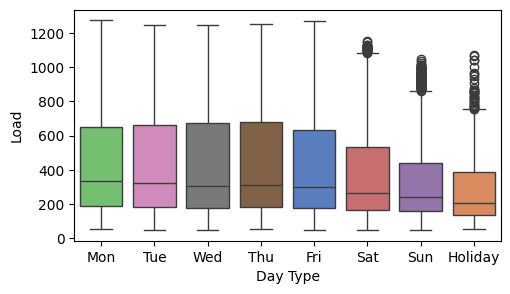

In [6]:
plt.figure(figsize=(5.5,3))
sns.boxplot(x='DayType', y='Load', hue='DayType', data=df 
            ,order=day_types
            ,palette='muted'
            )
plt.xlabel('Day Type')
#plt.title('',fontsize=12, fontweight='bold')
plt.savefig('./plots/TX_boxplot.svg', format='svg')

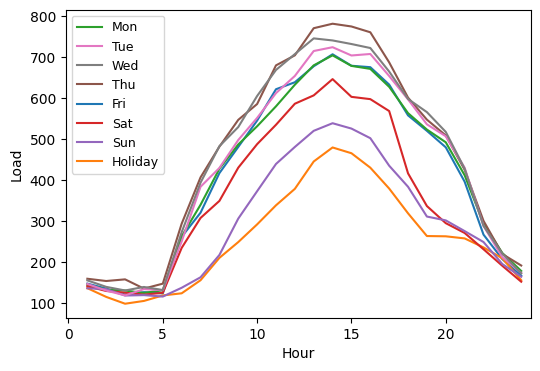

<Figure size 640x480 with 0 Axes>

In [8]:
# plt.figure(figsize=(6,4))
# for day_type in day_types:
#     df_daytype = pd.DataFrame(df[df['DayType']==day_type].groupby('Hour')['Load'].median())
#     sns.lineplot(x='Hour', y='Load', data=df_daytype,label=day_type)
    
# plt.legend(loc='upper left',fontsize=9)
# plt.xlim(xmax=24.5)
# plt.show()


plt.figure(figsize=(6,4))
sns.lineplot(x='Hour',y='Load',hue='DayType',data=df
             ,estimator=np.median
             ,errorbar=None#,palette='muted'
             )

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[labels.index(day_type)] for day_type in day_types]
           ,day_types,loc='upper left',fontsize=9)
plt.xlim(xmax=24.5)
plt.show()
plt.savefig('./plots/TX_byhour_bydaytype.svg', format='svg')

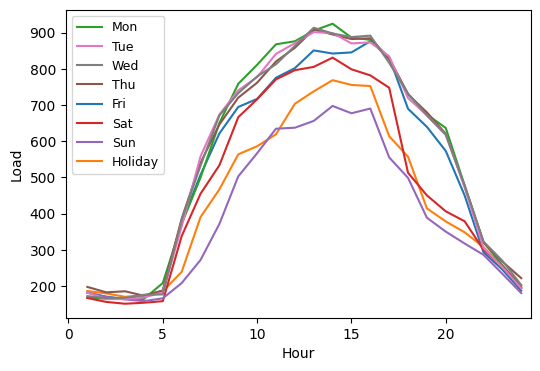

In [9]:
plt.figure(figsize=(6,4))
sns.lineplot(x='Hour',y='Load',hue='DayType',data=df.loc[df['DaylightSavings']==1,:]
             ,estimator=np.median
             ,errorbar=None#,palette='muted'
             )

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[labels.index(day_type)] for day_type in day_types]
           ,day_types,loc='upper left',fontsize=9)
plt.xlim(xmax=24.5)
plt.show()

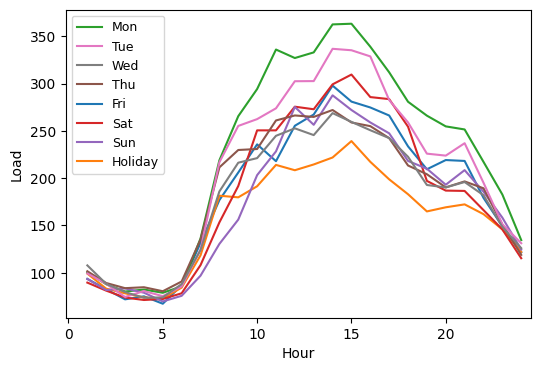

In [10]:
plt.figure(figsize=(6,4))
sns.lineplot(x='Hour',y='Load',hue='DayType',data=df.loc[df['DaylightSavings']==0,:]
             ,estimator=np.median
             ,errorbar=None#,palette='muted'
             )

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[labels.index(day_type)] for day_type in day_types]
           ,day_types,loc='upper left',fontsize=9)
plt.xlim(xmax=24.5)
plt.show()

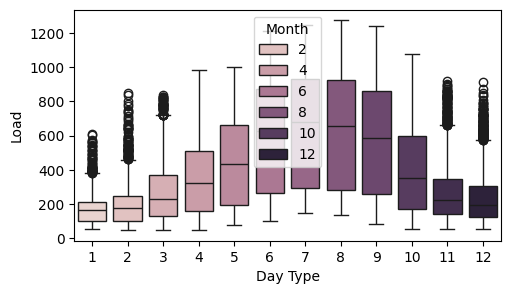

In [29]:
plt.figure(figsize=(5.5,3))
sns.boxplot(x='Month', y='Load', hue='Month', data=df
            )
#plt.title('',fontsize=12, fontweight='bold')
plt.savefig('./plots/TX_boxplot.svg', format='svg')

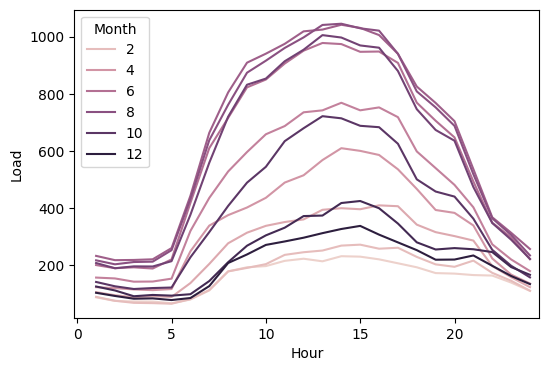

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize=(6,4))
sns.lineplot(x='Hour',y='Load',hue='Month',data=df
             ,estimator=np.median
             ,errorbar=None#,palette='muted'
             )

plt.xlim(xmax=24.5)
plt.show()
plt.savefig('./plots/TX_byhour_bymonth.svg', format='svg')

<Axes: xlabel='Outdoor Drybulb Temperature [C]', ylabel='Load'>

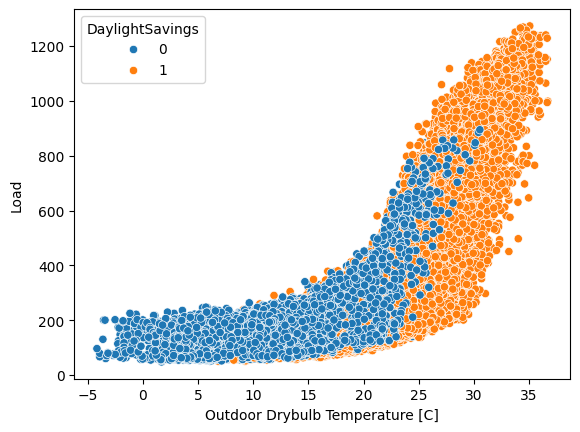

In [30]:
sns.scatterplot(x='Outdoor Drybulb Temperature [C]',y='Load'
                ,hue='DaylightSavings'
                ,data=df)

In [ ]:
df2 = df.iloc[1450:2000,:]

In [12]:
df2

,Month,Hour,DayType,DaylightSavings,Load,Load_1,Load_2,Load_3,Load_4,Load_5,...,24h Prediction Outdoor Drybulb Temperature [C],6h Prediction Outdoor Relative Humidity [%],12h Prediction Outdoor Relative Humidity [%],24h Prediction Outdoor Relative Humidity [%],6h Prediction Diffuse Solar Radiation [W/m2],12h Prediction Diffuse Solar Radiation [W/m2],24h Prediction Diffuse Solar Radiation [W/m2],6h Prediction Direct Solar Radiation [W/m2],12h Prediction Direct Solar Radiation [W/m2],24h Prediction Direct Solar Radiation [W/m2]
1450,3,11,Sun,0,391.75,78.09,28.45,34.08,22.85,43.23,...,7.60,75.96,94.69,79.53,42.97,0.00,168.47,882.35,0.00,814.58
1451,3,12,Sun,0,508.67,80.81,47.75,51.03,57.09,48.18,...,6.82,79.55,91.37,83.10,17.34,0.00,142.87,460.57,0.00,811.36
1452,3,13,Sun,0,524.73,86.27,47.64,72.81,75.31,48.11,...,7.03,82.02,97.67,79.08,0.00,0.00,150.00,0.00,0.00,790.94
1453,3,14,Sun,0,574.13,88.35,53.35,78.08,83.05,51.07,...,7.68,82.02,93.05,74.29,0.00,0.00,144.38,0.00,0.00,798.37
1454,3,15,Sun,0,573.20,88.75,49.30,78.95,82.39,54.40,...,7.77,85.60,91.56,72.05,0.00,0.00,121.05,0.00,0.00,753.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3,4,Tue,1,62.04,13.79,3.27,2.36,0.44,11.09,...,8.47,44.25,25.71,49.04,38.22,50.87,0.00,1152.84,1029.08,0.00
1996,3,5,Tue,1,65.69,13.23,6.43,2.70,0.44,10.22,...,7.53,36.91,26.73,47.20,43.60,47.93,0.00,1196.89,882.16,0.00
1997,3,6,Tue,1,101.03,17.90,9.30,2.36,0.44,12.57,...,8.47,32.79,27.62,38.92,45.68,30.10,0.00,1204.19,592.06,0.00
1998,3,7,Tue,1,180.17,28.94,10.15,4.77,0.71,17.41,...,8.99,29.39,29.79,45.63,45.54,0.00,47.43,1203.10,0.00,252.11


<Axes: >

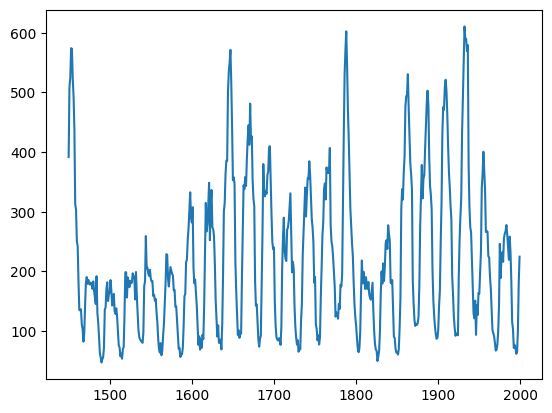

In [13]:
df2['Load'].plot()

<Axes: >

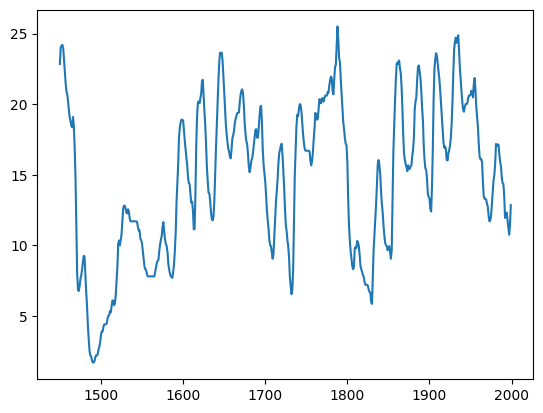

In [14]:
df2['Outdoor Drybulb Temperature [C]'].plot()

In [16]:
df2.loc[(df['DaylightSavings']==0) & (df['DayType']=='Tue') & (df['Hour']==7),'Load'].mean()

136.05

In [17]:
df2.loc[(df['DaylightSavings']==1) & (df['DayType']=='Tue') & (df['Hour']==7),'Load'].mean()

204.29666666666665

<Axes: >

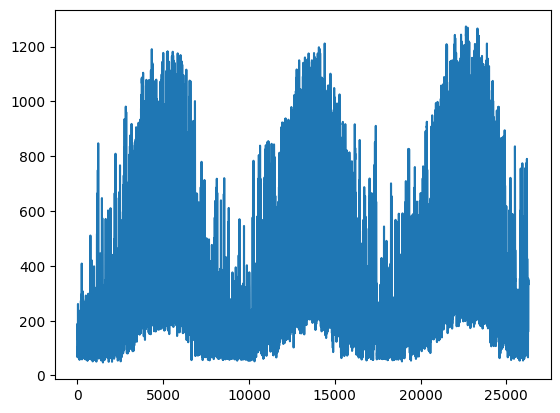

In [18]:
df['Load'].plot()